# Librerias

In [10]:
import pandas as pd



# Importamos el dataset

In [11]:
# Importamos el dataset
df = pd.read_csv("../data/hypertension_dataset.csv")

# Revisar las primeras filas
df.head()

,Country,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Smoking_Status,Alcohol_Intake,Physical_Activity_Level,Family_History,...,Sleep_Duration,Heart_Rate,LDL,HDL,Triglycerides,Glucose,Gender,Education_Level,Employment_Status,Hypertension
0,UK,58,29.5,230,160,79,Never,27.9,Low,Yes,...,6.1,80,100,75,72,179,Female,Primary,Unemployed,High
1,Spain,34,36.2,201,120,84,Never,27.5,High,Yes,...,9.8,56,77,47,90,113,Male,Secondary,Unemployed,High
2,Indonesia,73,18.2,173,156,60,Current,1.8,High,Yes,...,5.2,75,162,56,81,101,Male,Primary,Employed,Low
3,Canada,60,20.3,183,122,94,Never,11.6,Moderate,Yes,...,7.5,71,164,93,94,199,Female,Secondary,Retired,High
4,France,73,21.8,296,91,97,Never,29.1,Moderate,Yes,...,5.0,52,108,74,226,157,Female,Primary,Employed,High


# Exploramos los datos

In [12]:
# Informacion general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174982 entries, 0 to 174981
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Country                  174982 non-null  object 
 1   Age                      174982 non-null  int64  
 2   BMI                      174982 non-null  float64
 3   Cholesterol              174982 non-null  int64  
 4   Systolic_BP              174982 non-null  int64  
 5   Diastolic_BP             174982 non-null  int64  
 6   Smoking_Status           174982 non-null  object 
 7   Alcohol_Intake           174982 non-null  float64
 8   Physical_Activity_Level  174982 non-null  object 
 9   Family_History           174982 non-null  object 
 10  Diabetes                 174982 non-null  object 
 11  Stress_Level             174982 non-null  int64  
 12  Salt_Intake              174982 non-null  float64
 13  Sleep_Duration           174982 non-null  float64
 14  Hear

In [13]:
# Estadisticas descriptivas
df.describe()

,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Alcohol_Intake,Stress_Level,Salt_Intake,Sleep_Duration,Heart_Rate,LDL,HDL,Triglycerides,Glucose
count,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000
mean,53.493319,27.494672,224.539335,134.505229,89.450315,14.991069,5.013041,8.482757,6.996468,74.495085,129.528271,64.573105,149.569836,134.488187
std,20.786353,7.213866,43.361589,26.019268,17.310789,8.652624,2.582341,3.750074,1.730731,14.438573,34.635795,20.190666,57.765006,37.526882
min,18.000000,15.000000,150.000000,90.000000,60.000000,0.000000,1.000000,2.000000,4.000000,50.000000,70.000000,30.000000,50.000000,70.000000
25%,36.000000,21.200000,187.000000,112.000000,74.000000,7.500000,3.000000,5.200000,5.500000,62.000000,100.000000,47.000000,100.000000,102.000000
50%,54.000000,27.500000,225.000000,135.000000,89.000000,15.000000,5.000000,8.500000,7.000000,74.000000,130.000000,65.000000,150.000000,134.000000
75%,71.000000,33.700000,262.000000,157.000000,104.000000,22.500000,7.000000,11.700000,8.500000,87.000000,160.000000,82.000000,200.000000,167.000000
max,89.000000,40.000000,299.000000,179.000000,119.000000,30.000000,9.000000,15.000000,10.000000,99.000000,189.000000,99.000000,249.000000,199.000000


# Limpieza de Datos

In [14]:
# Verificar si hay valores nulos
df.isnull().sum()

Country                    0
Age                        0
BMI                        0
Cholesterol                0
Systolic_BP                0
Diastolic_BP               0
Smoking_Status             0
Alcohol_Intake             0
Physical_Activity_Level    0
Family_History             0
Diabetes                   0
Stress_Level               0
Salt_Intake                0
Sleep_Duration             0
Heart_Rate                 0
LDL                        0
HDL                        0
Triglycerides              0
Glucose                    0
Gender                     0
Education_Level            0
Employment_Status          0
Hypertension               0
dtype: int64

In [15]:
# Eliminamos columnas innecesarias
df.drop('Country', axis=1, inplace=True)

# Preparacion y entrenamiento del modelo

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

In [17]:
# Separa características (X) y objetivo (y)
X = df.drop(columns=["Hypertension"])
y = df["Hypertension"]

In [18]:
# Codificar variables categóricas y objetivo
X_encoded = pd.get_dummies(X)
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)  # High=1, Low=0 

In [19]:
# Balancear datos con SMOTE 
sm = SMOTE(random_state=42)
X_balanced, y_balanced = sm.fit_resample(X_encoded, y_encoded)

In [20]:
# Separar en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42
)

In [21]:

# Entrenar modelo con balanceo interno adicional
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced"  # para que sea robusto
)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [22]:
# Evaluar modelo
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True) 
conf_mat = confusion_matrix(y_test, y_pred).tolist()  

In [23]:
print("Accuracy:", acc)
print("Classification Report:", report)
print("Confusion Matrix:", conf_mat)

Accuracy: 0.8035696539661717
Classification Report: {'0': {'precision': 0.7169069086314822, 'recall': 0.9990396542755392, 'f1-score': 0.8347794105354666, 'support': 24991.0}, '1': {'precision': 0.9984503131658811, 'recall': 0.6106547666061133, 'f1-score': 0.7578230292337474, 'support': 25322.0}, 'accuracy': 0.8035696539661717, 'macro avg': {'precision': 0.8576786108986816, 'recall': 0.8048472104408262, 'f1-score': 0.796301219884607, 'support': 50313.0}, 'weighted avg': {'precision': 0.8586047221114983, 'recall': 0.8035696539661717, 'f1-score': 0.7960480789249059, 'support': 50313.0}}
Confusion Matrix: [[24967, 24], [9859, 15463]]


# Visualizacion de los Datos

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


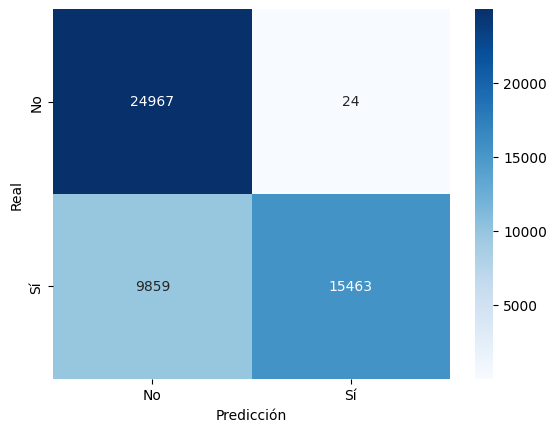

In [25]:
#MATRIZ DE CONFUSION
cm = conf_mat
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


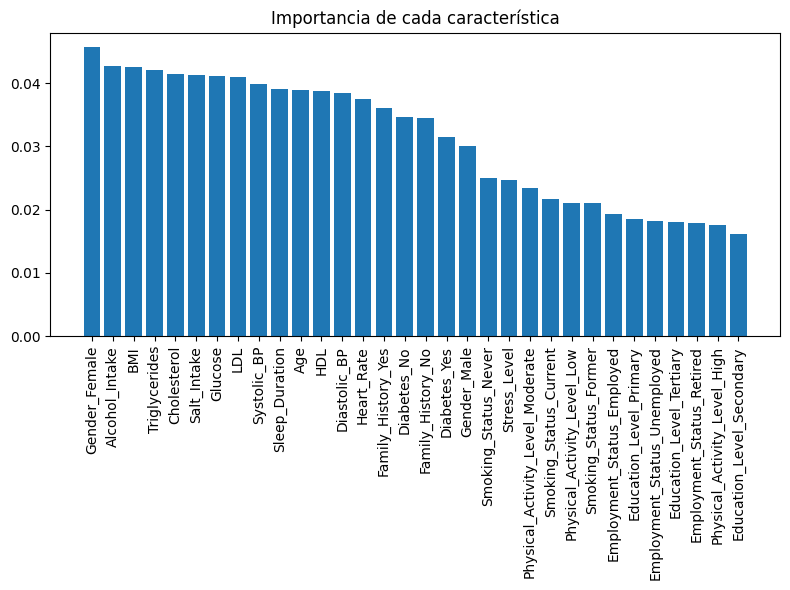

In [26]:
# Visualizacion de las caracteristicas mas importantes

importances = model.feature_importances_
features = X_encoded.columns  # columnas codificadas
indices = importances.argsort()[::-1]

plt.figure(figsize=(8,6))
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.title('Importancia de cada característica')
plt.tight_layout()
plt.show()


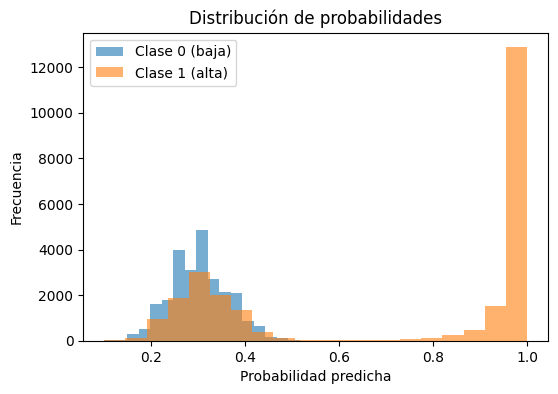

In [27]:
# Visualizacion de la distribucion de las probabilidades

# Obtener probabilidades de la clase "1"
y_proba = model.predict_proba(X_test)[:, 1]

plt.figure(figsize=(6,4))
plt.hist(y_proba[y_test == 0], bins=20, alpha=0.6, label='Clase 0 (baja)')
plt.hist(y_proba[y_test == 1], bins=20, alpha=0.6, label='Clase 1 (alta)')
plt.xlabel('Probabilidad predicha')
plt.ylabel('Frecuencia')
plt.title('Distribución de probabilidades')
plt.legend()
plt.show()



# Guardamos el modelo y las metricas

In [30]:
import joblib
joblib.dump(model, '../app/models/modelos.pkl', compress=3)


['../app/models/modelos.pkl']

In [31]:
import json
# Exporta las métricas del modelo a un archivo JSON
metrics = {
    "accuracy": acc,
    "classification_report": report,
    "confusion_matrix": conf_mat # para JSON debe ser lista
}

with open("../app/models/model_metrics.json", "w") as f:
    json.dump(metrics, f, indent=4)

print("Métricas completas exportadas a model_metrics.json")

Métricas completas exportadas a model_metrics.json


In [32]:
import json

categorical_columns = ['Smoking_Status', 'Physical_Activity_Level', 'Family_History',
                       'Diabetes', 'Gender', 'Education_Level', 'Employment_Status']

categorical_allowed_values = {
    col: sorted(df[col].dropna().unique().tolist())
    for col in categorical_columns
}

with open("../app/categorical_allowed_values.json", "w", encoding='utf-8') as f:
    json.dump(categorical_allowed_values, f, indent=4, ensure_ascii=False)

In [33]:
# Exportar las columnas del modelo
joblib.dump(list(X_encoded.columns), '../app/models/model_columns.pkl')


['../app/models/model_columns.pkl']